# Análisis exploratorio de datos


1. Importamos librerias y datasets 


2. Features 


3. Missing data


4. Analizamos los datasets

    4.a. Descripcion estadistica de los datos
    
    4.b. Countplot
    
    4.c. Scatter plot - precio vs m2
    
    4.d. Scatterplot c/reg - ambientes vs precio
    
    4.e. Heatmap de correlación
    
    4.f. Scatterplot entre usd/m2 , m2 y ambientes
    


# Filtrado de Outliers

1. Visualizacion de datos mayores y menores al cuantil 95 

    Box plot- Barrio usd/m2
   
   
2. Filtrado por barrio

    2.a. Selección de barrios y filtrado 
    
    2.b. Matriz con filtro común
    
    2.c. Boxplot con datos filtrados
    
    2.d. Estadísticas de los datos sin filtro y con filtro
    
    
3. Comparacion grafica con y sin outsiders 2016


4. Comparación de estadísticas de los tres años


# Clustering con K Means

1. Auto scaling


2. PCA


3. Cluster


4. Mapa con etiquetas del clustering


##  Importamos librerias y los data sets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

In [2]:
Deptos_2016 = pd.read_csv('departamentos-en-venta-2016.csv', delimiter=';')
Deptos_2010 = pd.read_csv('departamentos-en-venta-2010.csv', delimiter=';')
Deptos_2005 = pd.read_csv('departamentos-en-venta-2005.csv', delimiter=';')

## Features del data set

In [3]:
Deptos_2016.dtypes

CALLE                       object
NUMERO                     float64
ID_ZONAPRO                   int64
OPERACION                   object
TIPO                        object
M2                           int64
M2CUB                        int64
PRECIOTEXT                  object
PRECIOARS                    int64
PRECIOARSM                   int64
DOLARES                      int64
U_S_M2                       int64
AMBIENTES                    int64
ANTIGUEDAD                   int64
BAÑOS                        int64
DIRECCION                   object
LOCATION                    object
PUBLICADO                   object
PROCESADO                   object
URL                         object
REVISION                   float64
NOTA                       float64
DIRECCION_NORMALIZADA       object
BARRIO                      object
COMUNA                      object
CODIGO_POSTAL              float64
CODIGO_POSTAL_ARGENTINO     object
LATITUD                    float64
LONGITUD            

In [4]:
Deptos_2010.columns

Index(['CALLE', 'NUMERO', 'M2', 'DOLARES', 'U_S_M2', 'AMBIENTES', 'ANTIGUEDAD',
       'ORIENT', 'BAULERA', 'COCHERA', 'BAÑOS', 'LAVADERO', 'TERRAZA',
       'BARRIO', 'COMUNA', 'LON', 'LAT'],
      dtype='object')

In [5]:
Deptos_2005.columns

Index(['CALLE', 'NUMERO', 'M2', 'DOLARES', 'U_S_M2', 'AMBIENTES', 'ANTIGUEDAD',
       'ORIENT', 'BAULERA', 'COCHERA', 'BAÑOS', 'LAVADERO', 'TERRAZA',
       'BARRIO', 'COMUNA', 'LON', 'LAT'],
      dtype='object')

In [6]:
#Matriz aux para ver la cantidad original de registros
s=[0]*3
s[0]=np.shape(Deptos_2016)[0]
s[1]=np.shape(Deptos_2010)[0]
s[2]=np.shape(Deptos_2005)[0]

##  Missing data

### Limpiamos 2016

In [7]:
Deptos_2016.shape

(7564, 29)

In [8]:
# Eliminamos un registro (row) si CUALQUIERA (any) de las siguientes Features esta vacia 

# Cantidad de registros sin Features vacias
Deptos_2016.dropna(subset=['U_S_M2','BARRIO','M2','AMBIENTES', 'LATITUD', 'LONGITUD' ] ,how='any').shape

(6182, 29)

In [9]:
Deptos_2016=Deptos_2016.dropna(subset=['PRECIOARS','U_S_M2','BARRIO','M2','AMBIENTES', 'LATITUD', 'LONGITUD' ] ,how='any')

In [10]:
Deptos_2016.shape

(6182, 29)

In [11]:
# Eliminamos registros que contengan cero en feathures que vamos a necesitar 

q=Deptos_2016.loc[Deptos_2016['U_S_M2']==0]
Deptos_2016 =Deptos_2016.drop(Deptos_2016.U_S_M2[q.index].index) 

q=Deptos_2016.loc[Deptos_2016['M2']==0]
Deptos_2016 =Deptos_2016.drop(Deptos_2016.M2[q.index].index) 

q=Deptos_2016.loc[Deptos_2016['AMBIENTES']==0]
Deptos_2016 =Deptos_2016.drop(Deptos_2016.AMBIENTES[q.index].index) 


In [12]:
Deptos_2016.shape

(5816, 29)

## Revisamos si algun registro tiene datos vacios

In [13]:
col_nulls_sum = Deptos_2016.isnull().sum().sort_values(ascending=False)

total = Deptos_2016.isnull().sum().sort_values(ascending=False)
percent = (Deptos_2016.isnull().sum() / Deptos_2016.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Deptos_2016 = Deptos_2016.drop( (missing_data[missing_data['Total'] > 1]).index  , axis=1 ) # eliminamos las columnas 

### Limpiamos 2010

In [14]:
Deptos_2010.dropna(subset=['DOLARES','U_S_M2','BARRIO','M2','AMBIENTES', 'LAT', 'LON' ] ,how='any').shape

(18466, 17)

In [15]:
Deptos_2010=Deptos_2010.dropna(subset=['DOLARES','U_S_M2','BARRIO','M2','AMBIENTES', 'LAT', 'LON' ] ,how='any')

In [16]:
# Eliminamos registros que contengan cero en feathures que vamos a necesitar 

q=Deptos_2010.loc[Deptos_2010['U_S_M2']==0]
Deptos_2010 =Deptos_2010.drop(Deptos_2010.U_S_M2[q.index].index) 

q=Deptos_2010.loc[Deptos_2010['M2']==0]
Deptos_2010 =Deptos_2010.drop(Deptos_2010.M2[q.index].index) 

q=Deptos_2010.loc[Deptos_2010['AMBIENTES']==0]
Deptos_2010 =Deptos_2010.drop(Deptos_2010.AMBIENTES[q.index].index) 

q=Deptos_2010.loc[Deptos_2010.LAT.isna()]
Deptos_2010=Deptos_2010.drop(Deptos_2010.LAT[q.index].index)


#Deptos_2010 = Deptos_2010.drop( Deptos_2010.loc[Deptos_2010['BARRIO'].isnull()].index) 

In [17]:
Deptos_2010.loc[Deptos_2010.LAT.isna()]


,CALLE,NUMERO,M2,DOLARES,U_S_M2,AMBIENTES,ANTIGUEDAD,ORIENT,BAULERA,COCHERA,BAÑOS,LAVADERO,TERRAZA,BARRIO,COMUNA,LON,LAT


In [18]:
col_nulls_sum = Deptos_2010.isnull().sum().sort_values(ascending=False)

total = Deptos_2010.isnull().sum().sort_values(ascending=False)
percent = (Deptos_2010.isnull().sum() / Deptos_2010.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Deptos_2010 = Deptos_2010.drop( (missing_data[missing_data['Total'] > 1]).index  , axis=1 ) # eliminamos las columnas 


### Limpiamos 2005

In [19]:
Deptos_2005.dropna(subset=['DOLARES','U_S_M2','BARRIO','M2','AMBIENTES', 'LAT', 'LON' ] ,how='any').shape

(3503, 17)

In [20]:
Deptos_2005=Deptos_2005.dropna(subset=['DOLARES','U_S_M2','BARRIO','M2','AMBIENTES', 'LAT', 'LON' ] ,how='any')

In [21]:
# Eliminamos registros que contengan cero en feathures que vamos a necesitar 

q=Deptos_2005.loc[Deptos_2005['DOLARES']==0]
Deptos_2005 =Deptos_2005.drop(Deptos_2005.DOLARES[q.index].index) 

q=Deptos_2005.loc[Deptos_2005['U_S_M2']==0]
Deptos_2005 =Deptos_2005.drop(Deptos_2005.U_S_M2[q.index].index) 

q=Deptos_2005.loc[Deptos_2005['M2']==0]
Deptos_2005 =Deptos_2005.drop(Deptos_2005.M2[q.index].index) 

q=Deptos_2005.loc[Deptos_2005['AMBIENTES']==0]
Deptos_2005 =Deptos_2005.drop(Deptos_2005.AMBIENTES[q.index].index) 

q=Deptos_2005.loc[Deptos_2005['LAT']==0]
Deptos_2010 =Deptos_2010.drop(Deptos_2010.LAT[q.index].index) 

q=Deptos_2005.loc[Deptos_2005['LON']==0]
Deptos_2005 =Deptos_2005.drop(Deptos_2005.LON[q.index].index) 


Deptos_2005 = Deptos_2005.drop( Deptos_2005.loc[Deptos_2005['BARRIO'].isnull()].index) 
Deptos_2005 = Deptos_2005.drop( Deptos_2005.loc[Deptos_2005['LAT'].isna()].index) 
Deptos_2005 = Deptos_2005.drop( Deptos_2005.loc[Deptos_2005['LON'].isna()].index) 


In [22]:
col_nulls_sum = Deptos_2005.isnull().sum().sort_values(ascending=False)

total = Deptos_2005.isnull().sum().sort_values(ascending=False)
percent = (Deptos_2005.isnull().sum() / Deptos_2005.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Deptos_2005 = Deptos_2005.drop( (missing_data[missing_data['Total'] > 1]).index  , axis=1 ) # eliminamos las columnas 


## Tamaño de los datasets despues de limpiar los data sets

In [23]:
#Matriz aux para ver la cantidad de registros son NaN

t=[0]*3
t[0]=np.shape(Deptos_2016)[0]
t[1]=np.shape(Deptos_2010)[0]
t[2]=np.shape(Deptos_2005)[0]

df1 = pd.DataFrame({ 'Año':['2016','2010','2005'] , 
                   'Datos originales':[s[0],s[1],s[2]] ,
                   'Datos limpios':[t[0],t[1],t[2]] } ) 
df1

,Año,Datos originales,Datos limpios
0,2016,7564,5816
1,2010,18466,18012
2,2005,3503,3503


In [24]:
aux=Deptos_2010.loc[Deptos_2010.BARRIO=='MONTSERRAT']
aux.head()

,CALLE,NUMERO,M2,DOLARES,U_S_M2,AMBIENTES,BAÑOS,BARRIO,COMUNA,LON,LAT
530,"ALSINA, ADOLFO",1600,45.0,76000,1688.9,2,1,MONTSERRAT,1,-58.388917,-34.611150
531,"ALSINA, ADOLFO",1600,68.0,95000,1397.1,3,1,MONTSERRAT,1,-58.388917,-34.611150
534,"ALSINA, ADOLFO",500,56.0,95000,1696.4,3,1,MONTSERRAT,1,-58.373431,-34.610108
535,"ALSINA, ADOLFO",1600,50.0,76000,1520.0,2,1,MONTSERRAT,1,-58.388917,-34.611150
538,"ALSINA, ADOLFO",1700,79.0,95000,1202.5,3,0,MONTSERRAT,1,-58.390343,-34.611253


In [25]:
Deptos_2010['BARRIO'].replace('MONTSERRAT','MONSERRAT', inplace=True)

In [26]:
v1=Deptos_2016.BARRIO.value_counts()
v2=Deptos_2010.BARRIO.value_counts()
v3=Deptos_2005.BARRIO.value_counts()

pd.concat([v1,v2,v3],axis=1,sort=True,keys=['2016','2010','2005'])

,2016,2010,2005
AGRONOMIA,5.0,61,15
ALMAGRO,302.0,903,247
BALVANERA,199.0,1158,195
BARRACAS,79.0,343,21
BELGRANO,443.0,1195,229
BOCA,14.0,149,28
BOEDO,25.0,189,38
CABALLITO,619.0,1254,327
CHACARITA,39.0,185,30
COGHLAN,38.0,118,9


In [27]:
u1=Deptos_2016.groupby('BARRIO')['U_S_M2'].mean()
u2=Deptos_2010.groupby('BARRIO')['U_S_M2'].mean()
u3=Deptos_2005.groupby('BARRIO')['U_S_M2'].mean()
pd.concat([u1,u2,u3],axis=1,keys=('2016','2010','2005'),sort=True)

,2016,2010,2005
AGRONOMIA,2323.600000,1469.963934,817.173333
ALMAGRO,2477.132450,1646.246733,805.247773
BALVANERA,2012.527638,1467.673489,776.992821
BARRACAS,2400.000000,1517.412828,748.233333
BELGRANO,3523.440181,2093.665523,1051.724454
BOCA,1996.142857,1121.531544,598.050000
BOEDO,2355.160000,1481.354497,732.281579
CABALLITO,2707.416801,1715.317783,889.815902
CHACARITA,2582.846154,1678.338919,831.753333
COGHLAN,2859.605263,1830.682203,856.977778


# Análisis exploratorio de datos


### 4.a. Descripcion estadistica de los datos 

In [28]:
a=Deptos_2016.U_S_M2.describe()
b=Deptos_2016.PRECIOARS.describe()
c = pd.concat([a, b], axis=1, keys=['usd / m2', 'Precio'])
c.head(10)

,usd / m2,Precio
count,5816.000000,5.816000e+03
mean,2773.569807,3.167202e+06
std,861.086598,3.001063e+06
min,135.000000,1.300000e+05
25%,2229.750000,1.662500e+06
50%,2634.000000,2.261686e+06
75%,3113.000000,3.395000e+06
max,10555.000000,7.875000e+07


C:\Users\Hernán\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


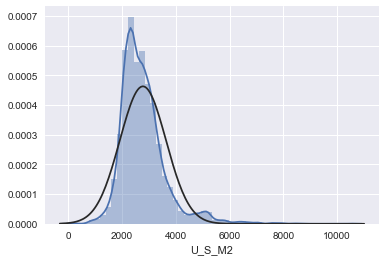

<Figure size 432x288 with 0 Axes>

In [29]:
sns.set()

sns.distplot(Deptos_2016['U_S_M2'], fit=norm);
fig = plt.figure()

In [30]:
a=Deptos_2010.U_S_M2.describe()
b=Deptos_2010.DOLARES.describe()
c = pd.concat([a, b], axis=1, keys=['Precio usd / m2', 'Precio'])
c.head(10)

,Precio usd / m2,Precio
count,18012.000000,1.801200e+04
mean,1783.260859,1.414468e+05
std,639.883248,1.432741e+05
min,317.100000,1.400000e+04
25%,1387.100000,7.489500e+04
50%,1710.450000,1.049385e+05
75%,2065.950000,1.570000e+05
max,16000.000000,6.000000e+06


C:\Users\Hernán\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


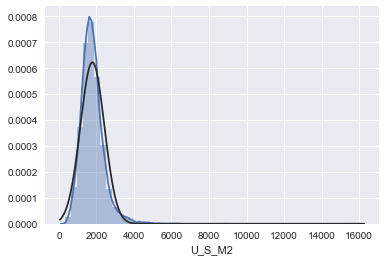

<Figure size 432x288 with 0 Axes>

In [31]:
sns.distplot(Deptos_2010['U_S_M2'], fit=norm);
fig = plt.figure()

In [32]:
a=Deptos_2005.U_S_M2.describe()
b=Deptos_2005.DOLARES.describe()
c = pd.concat([a, b], axis=1, keys=['Precio usd / m2', 'Precio'])
c.head(10)

,Precio usd / m2,Precio
count,3503.000000,3503.000000
mean,915.278276,61127.045675
std,325.943221,38695.426694
min,140.000000,7000.000000
25%,705.000000,40000.000000
50%,866.700000,52500.000000
75%,1054.450000,70000.000000
max,3543.300000,884852.000000


C:\Users\Hernán\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


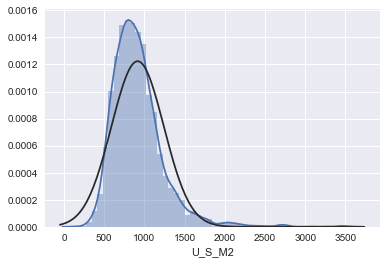

<Figure size 432x288 with 0 Axes>

In [33]:
sns.distplot(Deptos_2005['U_S_M2'], fit=norm);
fig = plt.figure()

### 4.b. Countplot

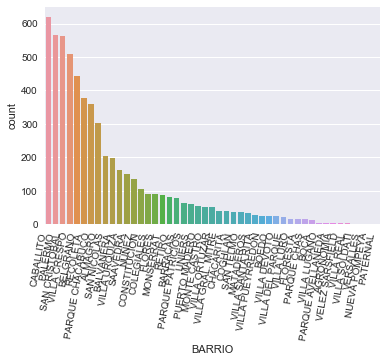

In [34]:
ax =sns.countplot(x="BARRIO", data=Deptos_2016 , order=Deptos_2016.BARRIO.value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right" );
plt.show()

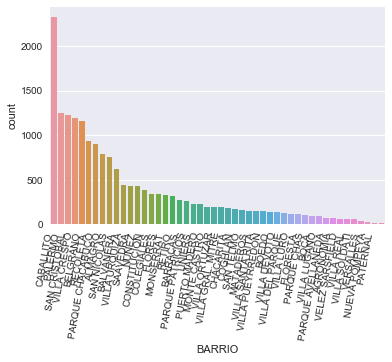

In [35]:
bx =sns.countplot(x="BARRIO", data=Deptos_2010, order=Deptos_2010.BARRIO.value_counts().index)

bx.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")
plt.show()

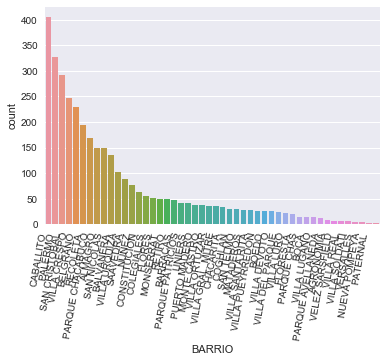

In [36]:
cx =sns.countplot(x="BARRIO", data=Deptos_2005 , order=Deptos_2005.BARRIO.value_counts().index)

cx.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")
plt.show()

### 4.c. Scatter plot - precio vs m2


In [37]:
Deptos_2016.DOLARES.replace('$','').astype(float);

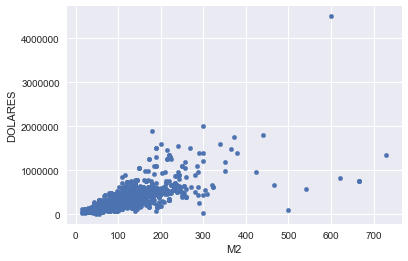

In [38]:
#scatter plot M2 / DOLARES - 2016

var = 'M2'
data = pd.concat([Deptos_2016['DOLARES'], Deptos_2016[var]], axis=1)
data.plot.scatter(x=var, y='DOLARES');

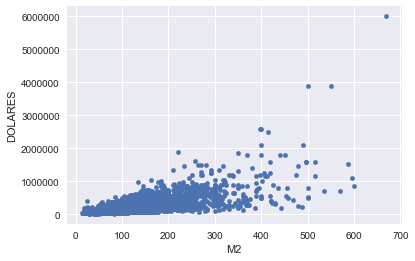

In [39]:
#scatter plot M2 / DOLARES - 2010

var = 'M2'
data = pd.concat([Deptos_2010['DOLARES'], Deptos_2010[var]], axis=1)
data.plot.scatter(x=var, y='DOLARES'); 

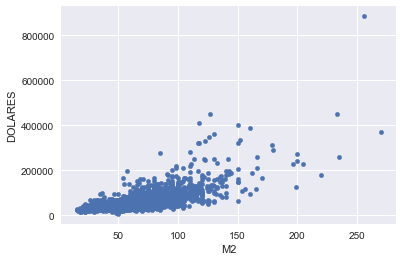

In [40]:
#scatter plot M2 / DOLARES - 2005

var = 'M2'
data = pd.concat([Deptos_2005['DOLARES'], Deptos_2005[var]], axis=1)
data.plot.scatter(x=var, y='DOLARES'); 

### 4.d. Heatmap

### para observar correlaciones cruzadas con todas las variables

In [41]:
# Heat-map - 2016

print("Variables mas importantes con respecto a nuestro objetivo")
corr = Deptos_2016.corr()
corr.sort_values(["DOLARES"], ascending = False, inplace = True)
print(corr.DOLARES)

Variables mas importantes con respecto a nuestro objetivo
DOLARES       1.000000
PRECIOARS     1.000000
M2CUB         0.816011
M2            0.792401
AMBIENTES     0.618312
U_S_M2        0.615380
BAÑOS         0.500987
LATITUD       0.236529
LONGITUD      0.076567
PRECIOARSM    0.003962
NUMERO       -0.026272
ID_ZONAPRO   -0.068745
ANTIGUEDAD   -0.088101
Name: DOLARES, dtype: float64


In [42]:
# Heat-map - 2010

print("Variables mas importantes con respecto a nuestro objetivo")
corr = Deptos_2010.corr()
corr.sort_values(["DOLARES"], ascending = False, inplace = True)
print(corr.DOLARES)

Variables mas importantes con respecto a nuestro objetivo
DOLARES      1.000000
M2           0.747366
U_S_M2       0.518881
AMBIENTES    0.439254
BAÑOS        0.403265
LAT          0.211466
LON          0.158867
COMUNA       0.020546
NUMERO      -0.001060
Name: DOLARES, dtype: float64


In [43]:
# Heat-map - 2005

print("Variables mas importantes con respecto a nuestro objetivo")
corr = Deptos_2005.corr()
corr.sort_values(["DOLARES"], ascending = False, inplace = True)
print(corr.DOLARES)

Variables mas importantes con respecto a nuestro objetivo
DOLARES      1.000000
M2           0.697937
U_S_M2       0.647752
LAT          0.279732
AMBIENTES    0.205297
LON          0.183301
COMUNA       0.039854
NUMERO      -0.000299
Name: DOLARES, dtype: float64


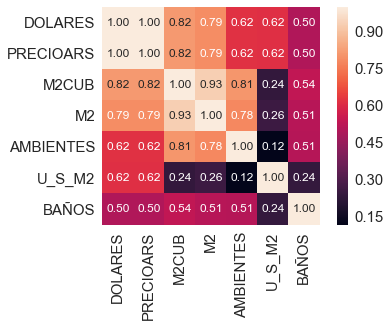

In [44]:
corrmat = Deptos_2016.corr()
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'DOLARES')['DOLARES'].index
cm = np.corrcoef(Deptos_2016[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

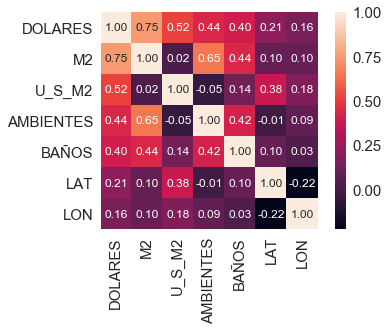

In [45]:
corrmat = Deptos_2010.corr()
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'DOLARES')['DOLARES'].index
cm = np.corrcoef(Deptos_2010[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

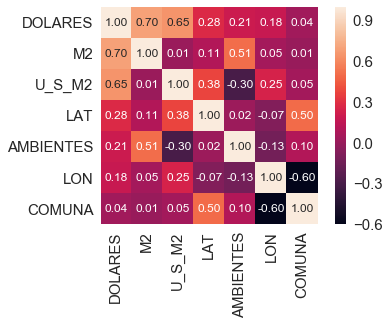

In [46]:
corrmat = Deptos_2005.corr()
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'DOLARES')['DOLARES'].index
cm = np.corrcoef(Deptos_2005[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 4.e. Scatterplot entre usd/m2 , m2 y ambientes

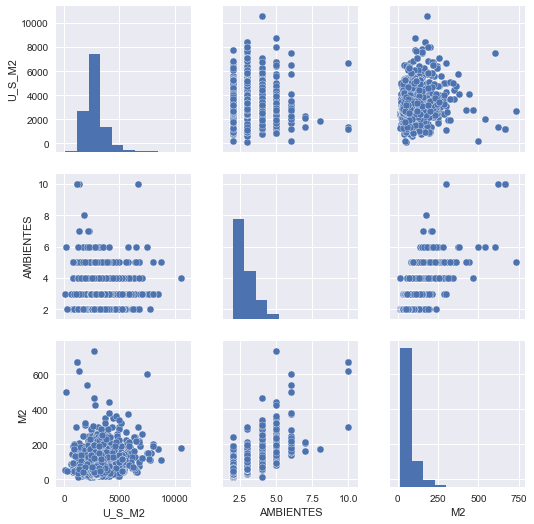

In [47]:
# scatterplot 2016

sns.set()
cols = ['U_S_M2', 'AMBIENTES', 'M2']
sns.pairplot(Deptos_2016[cols], size = 2.5)
plt.show()

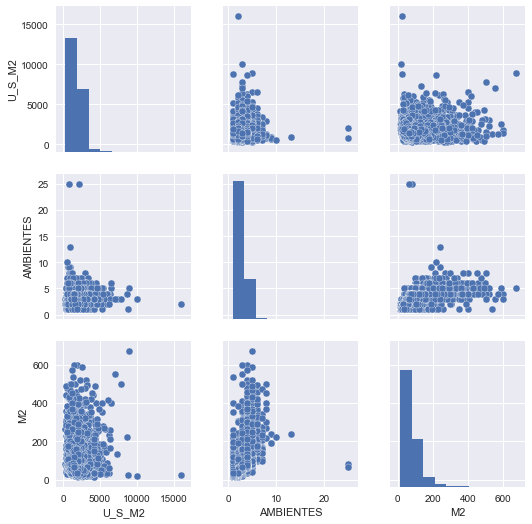

In [48]:
# scatterplot 2010

sns.set()
cols = ['U_S_M2', 'AMBIENTES', 'M2']
sns.pairplot(Deptos_2010[cols], size = 2.5)
plt.show()

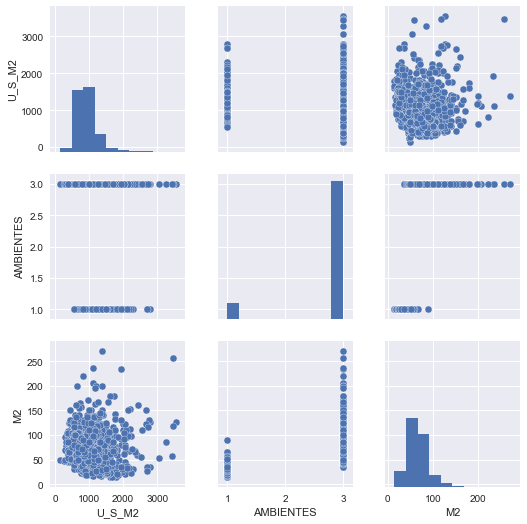

In [49]:
# scatterplot 2005

sns.set()
cols = ['U_S_M2', 'AMBIENTES', 'M2']
sns.pairplot(Deptos_2005[cols], size = 2.5)
plt.show()

# Filtrado de Outliners 

### Sacamos los valores que hacen ruido 

### A. Primero separamos por cuantil 95 el data set para tener un punto de referencia

### B. Despues filtramos por cada barrio para un mejor analisis, con un cuantil 90

### C. Comparación de estadísticas

# Filtro para 2016

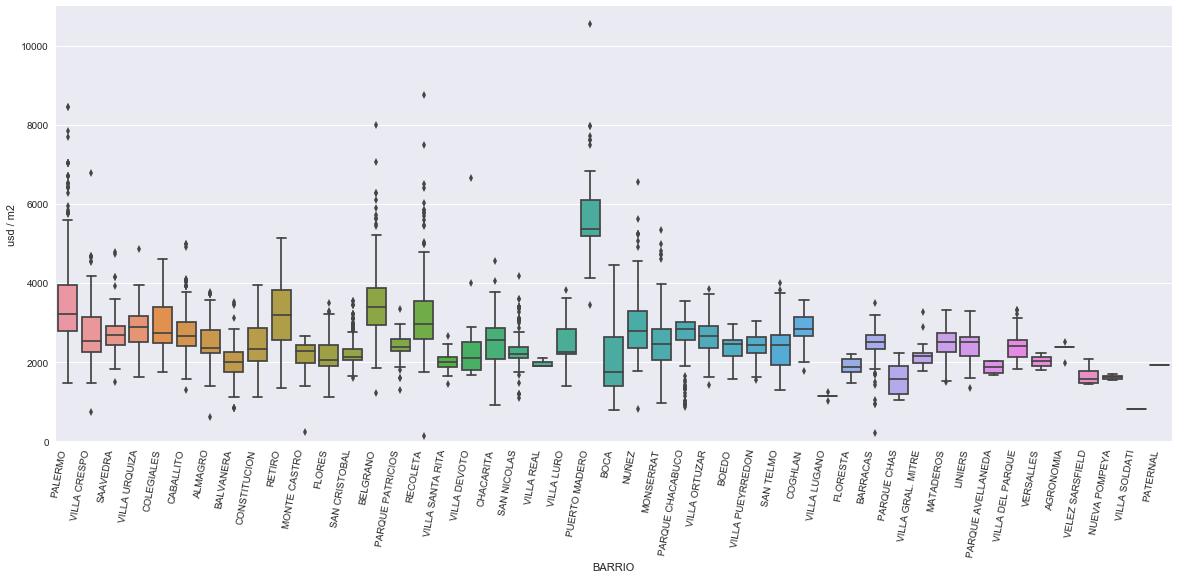

In [50]:
var = 'BARRIO'
data = pd.concat([Deptos_2016['U_S_M2'], Deptos_2016[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="U_S_M2", data=data)
plt.ylabel('usd / m2')

fig.axis(ymin=0, ymax=11000);

ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right");


In [51]:
percentil_2016 = Deptos_2016['U_S_M2'].quantile(0.95)
percentil_2016

4400.0

## Barrios 2016 mayores al cuantil 95

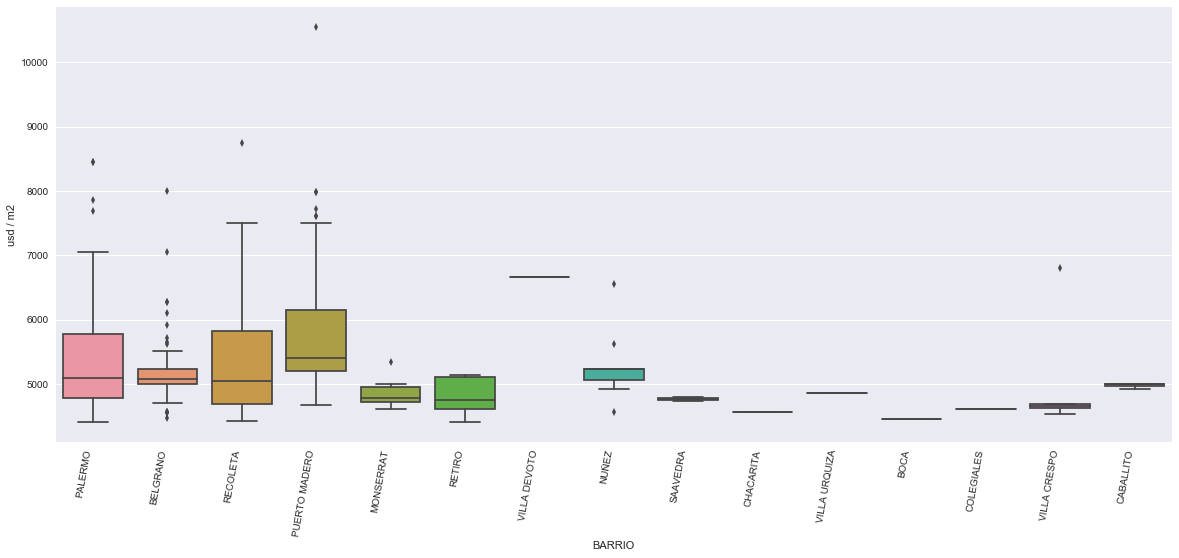

In [52]:
Deptos_2016_sup_per = Deptos_2016.loc[Deptos_2016['U_S_M2']>percentil_2016]

var = 'BARRIO'
data = pd.concat([Deptos_2016_sup_per['U_S_M2'], Deptos_2016_sup_per [var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="U_S_M2", data=data)
plt.ylabel('usd / m2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right");

## Barrios 2016 menor al cauntil 95

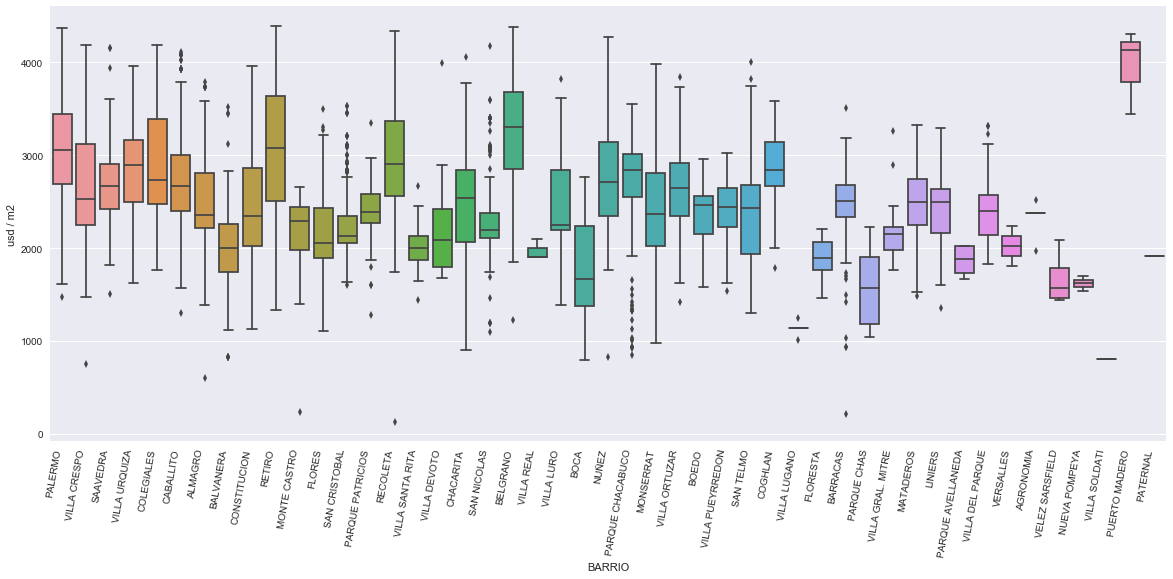

In [53]:
Deptos_2016_menor_per = Deptos_2016.loc[Deptos_2016['U_S_M2']<percentil_2016]
var = 'BARRIO'
data = pd.concat([Deptos_2016_menor_per['U_S_M2'], Deptos_2016_menor_per[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="U_S_M2", data=data)
plt.ylabel('usd / m2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right");

##  Filtro por barrios 2016

### Se filtran por serparado los barrios con mayor peso
### Los que tienen menor peso se filtran con el cuantil del conjunto

In [54]:
# Separo el barrio del data set
# le calculo el percentil 90
# filtro los valores mayores al percentil


PM =Deptos_2016.loc[Deptos_2016['BARRIO']== "PUERTO MADERO"]
PM = PM.loc[PM['U_S_M2']<PM['U_S_M2'].quantile(0.90)]

PALERMO=Deptos_2016.loc[Deptos_2016['BARRIO']== "PALERMO"]
PALERMO = PALERMO.loc[PALERMO['U_S_M2']<PALERMO['U_S_M2'].quantile(0.90)]

BELGRANO=Deptos_2016.loc[Deptos_2016['BARRIO']== "BELGRANO"]
BELGRANO = BELGRANO.loc[BELGRANO['U_S_M2']< BELGRANO['U_S_M2'].quantile(0.90)]

RECOLETA=Deptos_2016.loc[Deptos_2016['BARRIO']== "RECOLETA"]
RECOLETA = RECOLETA.loc[RECOLETA['U_S_M2']< RECOLETA['U_S_M2'].quantile(0.90)]

SAAVEDRA=Deptos_2016.loc[Deptos_2016['BARRIO']== "SAAVEDRA"]
SAAVEDRA=SAAVEDRA.loc[SAAVEDRA['U_S_M2']< SAAVEDRA['U_S_M2'].quantile(0.90)]

SAN_CRISTOBAL=Deptos_2016.loc[Deptos_2016['BARRIO']== "SAN CRISTOBAL"]
SAN_CRISTOBAL = SAN_CRISTOBAL.loc[SAN_CRISTOBAL['U_S_M2']< SAN_CRISTOBAL['U_S_M2'].quantile(0.90)]

DEVOTO=Deptos_2016.loc[Deptos_2016['BARRIO']== "VILLA DEVOTO"]
DEVOTO = DEVOTO.loc[DEVOTO['U_S_M2']<  DEVOTO['U_S_M2'].quantile(0.90)]

SAN_NICOLAS=Deptos_2016.loc[Deptos_2016['BARRIO']== "SAN NICOLAS"]    
SAN_NICOLAS = SAN_NICOLAS.loc[SAN_NICOLAS['U_S_M2']< SAN_NICOLAS['U_S_M2'].quantile(0.83)]  # Se le apica un filtro de 83

MITRE=Deptos_2016.loc[Deptos_2016['BARRIO']== "VILLA GRAL. MITRE"]
MITRE = MITRE.loc[MITRE['U_S_M2']< MITRE['U_S_M2'].quantile(0.90)]

LURO=Deptos_2016.loc[Deptos_2016['BARRIO']== "VILLA LURO"]
LURO = LURO.loc[LURO['U_S_M2']< LURO['U_S_M2'].quantile(0.80)]                              # Se le apica un filtro de 80


# Genero una matriz nueva con los barrios que no tiene filtro propio 

Barrios_16= Deptos_2016.loc[(Deptos_2016['BARRIO'] != "PALERMO" )] 
Barrios_16= Barrios_16.loc[(Barrios_16['BARRIO'] != "BELGRANO")]
Barrios_16= Barrios_16.loc[(Barrios_16['BARRIO'] != "RECOLETA")]    
Barrios_16= Barrios_16.loc[(Barrios_16['BARRIO'] != "PUERTO MADERO")]
Barrios_16= Barrios_16.loc[(Barrios_16['BARRIO'] != "SAN CRISTOBAL")]    
Barrios_16= Barrios_16.loc[(Barrios_16['BARRIO'] != "VILLA DEVOTO")]    
Barrios_16= Barrios_16.loc[(Barrios_16['BARRIO'] != "SAN NICOLAS")]   
Barrios_16= Barrios_16.loc[(Barrios_16['BARRIO'] != "VILLA GRAL. MITRE")]    
Barrios_16= Barrios_16.loc[(Barrios_16['BARRIO'] != "VILLA LURO")]  
Barrios_16= Barrios_16.loc[(Barrios_16['BARRIO'] != "SAAVEDRA")]    



# Le aplico el filtro a los barrios con datos homogeneos

Barrios_16 = Barrios_16.loc[Barrios_16['U_S_M2']< Barrios_16['U_S_M2'].quantile(0.90)]


## Dataset 2016 con datos filtrados

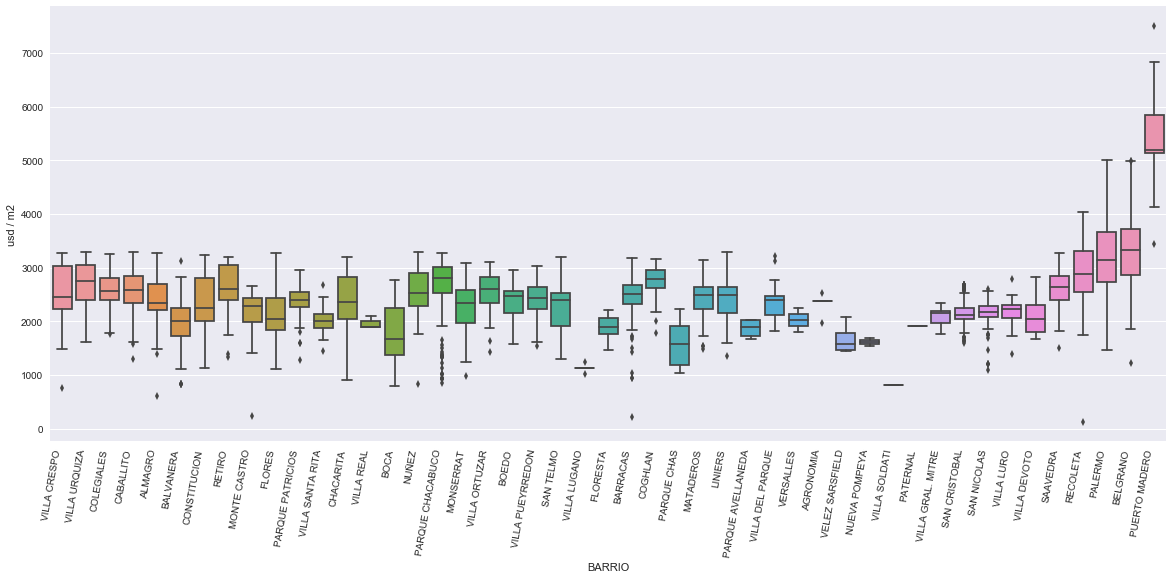

In [55]:
Deptos_2016_filtrado=pd.concat([Barrios_16,MITRE, SAN_CRISTOBAL,SAN_NICOLAS,
                                LURO,DEVOTO,SAAVEDRA,RECOLETA,PALERMO,BELGRANO,PM ])

var = 'BARRIO'
data = pd.concat([Deptos_2016_filtrado['U_S_M2'], Deptos_2016_filtrado[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="U_S_M2", data=data)
plt.ylabel('usd / m2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right");
plt.show()

## Estadística de los datos sin vs con filtro 2016

In [56]:
a=Deptos_2016.U_S_M2.describe()
b=Deptos_2016_filtrado.U_S_M2.describe()
d= pd.concat([a,b] , axis=1 ,
              keys=['Sin filtro','Con filtro'])
d.head(10)

,Sin filtro,Con filtro
count,5816.000000,5206.000000
mean,2773.569807,2619.735305
std,861.086598,670.426139
min,135.000000,135.000000
25%,2229.750000,2184.000000
50%,2634.000000,2524.000000
75%,3113.000000,2966.000000
max,10555.000000,7500.000000


# Filtrado para 2010

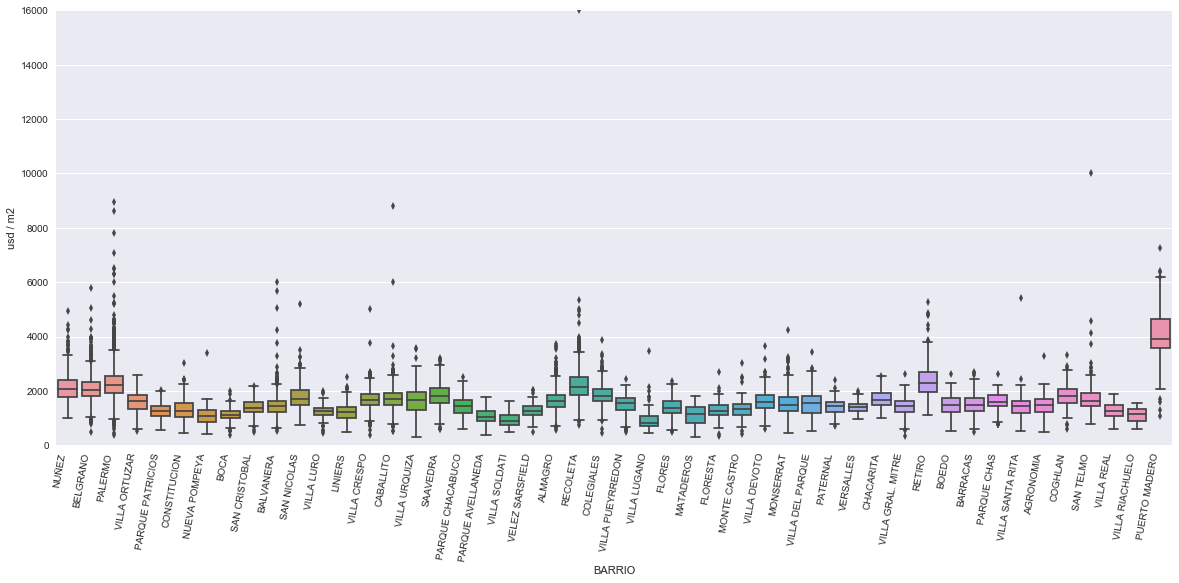

In [57]:
var = 'BARRIO'
data = pd.concat([Deptos_2010['U_S_M2'], Deptos_2010[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="U_S_M2", data=data)
plt.ylabel('usd / m2')

fig.axis(ymin=0, ymax=16000);

ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right");

## Barrios 2010 mayores al cauntil 95

In [58]:
percentil_2010 = Deptos_2010['U_S_M2'].quantile(0.95)
percentil_2010

2840.0

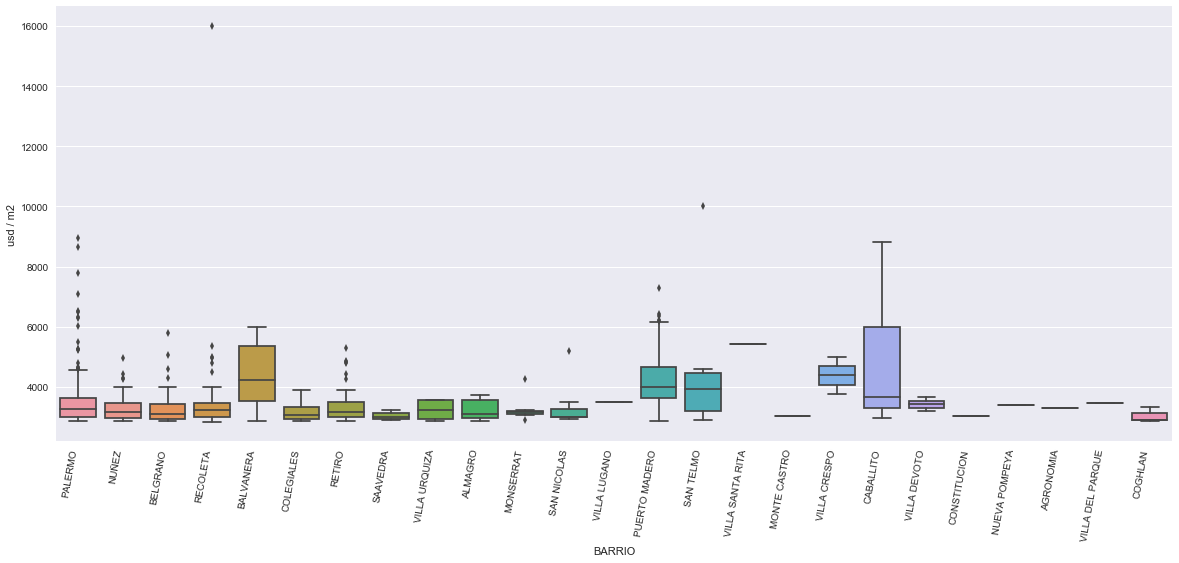

In [59]:
Deptos_2010_sup_quant90 = Deptos_2010.loc[Deptos_2010['U_S_M2']>percentil_2010]

var = 'BARRIO'
data = pd.concat([Deptos_2010_sup_quant90['U_S_M2'], Deptos_2010_sup_quant90 [var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="U_S_M2", data=data)
plt.ylabel('usd / m2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right");

## Barrios 2010 menor al cauntil 90

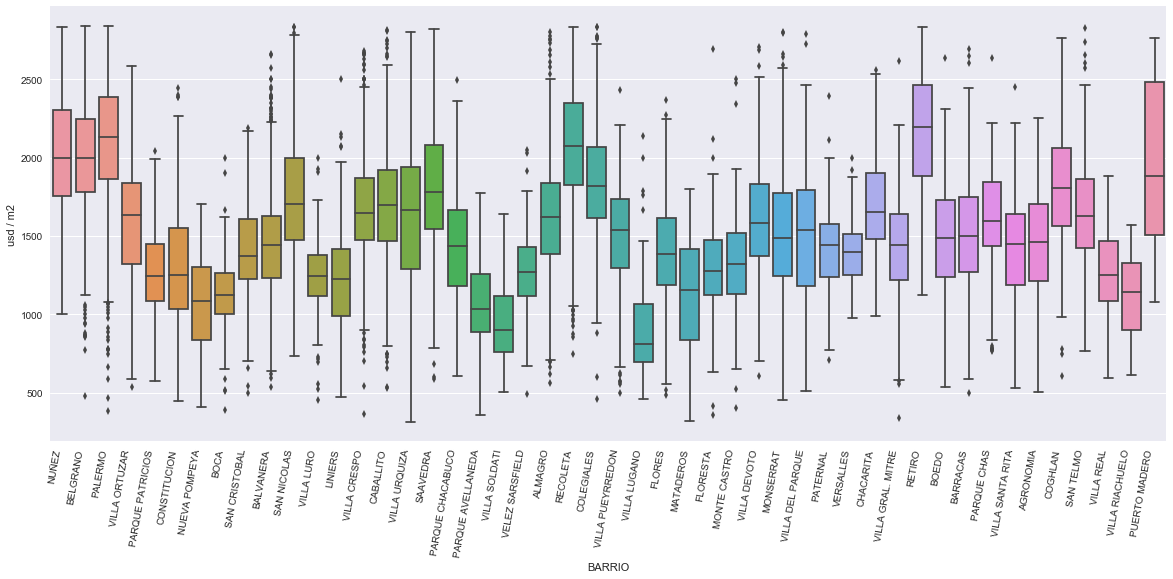

In [60]:
Deptos_2010_menor_quant90 = Deptos_2010.loc[Deptos_2010['U_S_M2']<percentil_2010]
var = 'BARRIO'
data = pd.concat([Deptos_2010_menor_quant90['U_S_M2'], Deptos_2010_menor_quant90[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="U_S_M2", data=data)
plt.ylabel('usd / m2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right");

##  Filtro por barrios 2010

In [61]:
# Separo el barrio del data set
# le calculo el percentil 90
# filtro los valores mayores al percentil


PM =Deptos_2010.loc[Deptos_2010['BARRIO']== "PUERTO MADERO"]
PM = PM.loc[PM['U_S_M2']<PM['U_S_M2'].quantile(0.90)]

PALERMO=Deptos_2010.loc[Deptos_2010['BARRIO']== "PALERMO"]
PALERMO = PALERMO.loc[PALERMO['U_S_M2']<PALERMO['U_S_M2'].quantile(0.90)]

BELGRANO=Deptos_2010.loc[Deptos_2010['BARRIO']== "BELGRANO"]
BELGRANO = BELGRANO.loc[BELGRANO['U_S_M2']< BELGRANO['U_S_M2'].quantile(0.90)]

RECOLETA=Deptos_2010.loc[Deptos_2010['BARRIO']== "RECOLETA"]
RECOLETA = RECOLETA.loc[RECOLETA['U_S_M2']< RECOLETA['U_S_M2'].quantile(0.90)]

NUÑEZ=Deptos_2010.loc[Deptos_2010['BARRIO']== "NUÑEZ"]
NUÑEZ = NUÑEZ.loc[NUÑEZ['U_S_M2']< NUÑEZ['U_S_M2'].quantile(0.90)]

BALVANERA=Deptos_2010.loc[Deptos_2010['BARRIO']== "BALVANERA"]
BALVANERA = BALVANERA.loc[BALVANERA['U_S_M2']< BALVANERA['U_S_M2'].quantile(0.90)]

NICOLAS=Deptos_2010.loc[Deptos_2010['BARRIO']== "SAN NICOLAS"]
NICOLAS = NICOLAS.loc[NICOLAS['U_S_M2']< NICOLAS['U_S_M2'].quantile(0.90)]

CRESPO=Deptos_2010.loc[Deptos_2010['BARRIO']== "VILLA CRESPO"]
CRESPO = CRESPO.loc[CRESPO['U_S_M2']< CRESPO['U_S_M2'].quantile(0.90)]

CABALLITO=Deptos_2010.loc[Deptos_2010['BARRIO']== "CABALLITO"]
CABALLITO = CABALLITO.loc[CABALLITO['U_S_M2']< CABALLITO['U_S_M2'].quantile(0.90)]

ALMAGRO=Deptos_2010.loc[Deptos_2010['BARRIO']== "ALMAGRO"]
ALMAGRO = ALMAGRO.loc[ALMAGRO['U_S_M2']< ALMAGRO['U_S_M2'].quantile(0.90)]

RETIRO=Deptos_2010.loc[Deptos_2010['BARRIO']== "RETIRO"]
RETIRO = RETIRO.loc[RETIRO['U_S_M2']< RETIRO['U_S_M2'].quantile(0.90)]

TELMO=Deptos_2010.loc[Deptos_2010['BARRIO']== "SAN TELMO"]
TELMO = TELMO.loc[TELMO['U_S_M2']< TELMO['U_S_M2'].quantile(0.90)]

LUGANO=Deptos_2016.loc[Deptos_2016['BARRIO']== "VILLA LUGANO"]
LUGANO=LUGANO.loc[LUGANO['U_S_M2']< LUGANO['U_S_M2'].quantile(0.90)]


# Genero una matriz nueva con los barrios que no tiene filtro propio 

Barrios= Deptos_2010.loc[(Deptos_2010['BARRIO'] != "PALERMO" )] 
Barrios= Barrios.loc[(Barrios['BARRIO'] != "BELGRANO")]
Barrios= Barrios.loc[(Barrios['BARRIO'] != "RECOLETA")]    
Barrios= Barrios.loc[(Barrios['BARRIO'] != "PUERTO MADERO")]
Barrios= Barrios.loc[(Barrios['BARRIO'] != "NUÑEZ")]
Barrios= Barrios.loc[(Barrios['BARRIO'] != "BALVANERA")]
Barrios= Barrios.loc[(Barrios['BARRIO'] != "SAN NICOLAS")]
Barrios= Barrios.loc[(Barrios['BARRIO'] != "VILLA CRESPO")]
Barrios= Barrios.loc[(Barrios['BARRIO'] != "CABALLITO")]
Barrios= Barrios.loc[(Barrios['BARRIO'] != "ALMAGRO")]
Barrios= Barrios.loc[(Barrios['BARRIO'] != "RETIRO")]
Barrios= Barrios.loc[(Barrios['BARRIO'] != "SAN TELMO")]
Barrios= Barrios.loc[(Barrios['BARRIO'] != "VILLA LUGANO")]



# Le aplico el filtro a los barrios con pocos outliners

Barrios = Barrios.loc[Barrios['U_S_M2']< Barrios['U_S_M2'].quantile(0.90)]


## Dataset 2010 con datos filtrados

C:\Users\Hernán\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


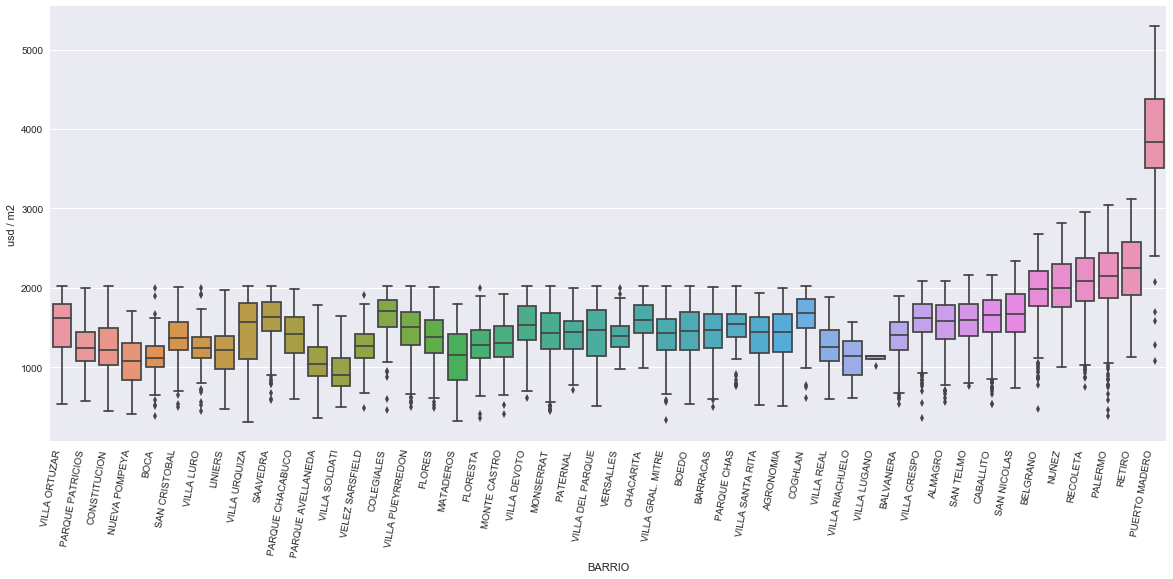

In [62]:
Deptos_2010_filtrado=pd.concat([Barrios,LUGANO,BALVANERA,CRESPO, 
                               ALMAGRO,TELMO,CABALLITO,NICOLAS,BELGRANO,NUÑEZ,RECOLETA,PALERMO,RETIRO,PM])

var = 'BARRIO'
data = pd.concat([Deptos_2010_filtrado['U_S_M2'], Deptos_2010_filtrado[var]], axis=1 )
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="U_S_M2", data=data)
plt.ylabel('usd / m2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right" );
plt.show()

## Estadística de los datos sin vs con filtro 2010

In [63]:
a=Deptos_2010_filtrado.U_S_M2.describe()
b=Deptos_2010_filtrado.U_S_M2.describe()
d= pd.concat([a,b] , axis=1 ,
              keys=['Sin filtro','Con filtro'])
d.head(10)

,Sin filtro,Con filtro
count,16124.000000,16124.000000
mean,1681.285190,1681.285190
std,505.535265,505.535265
min,317.100000,317.100000
25%,1352.375000,1352.375000
50%,1650.000000,1650.000000
75%,1950.000000,1950.000000
max,5294.100000,5294.100000


In [64]:
Deptos_2010_filtrado.LAT.isnull().sum()

4

In [65]:
q=Deptos_2010_filtrado.loc[Deptos_2010_filtrado.LAT.isna()]
Deptos_2010_filtrado=Deptos_2010_filtrado.drop(Deptos_2010_filtrado.LAT[q.index].index)


In [66]:
Deptos_2010_filtrado.LAT.isnull().sum()

0

# Filtrado para 2005

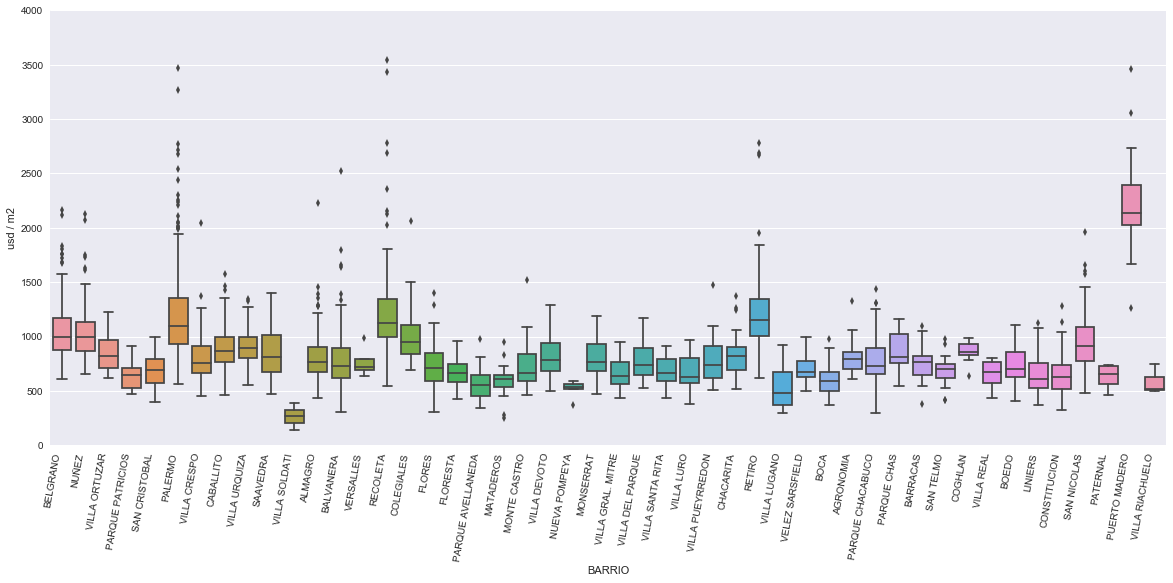

In [67]:
var = 'BARRIO'
data = pd.concat([Deptos_2005['U_S_M2'], Deptos_2005[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="U_S_M2", data=data)
plt.ylabel('usd / m2')
fig.axis(ymin=0, ymax=4000);
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right");

## Barrios 2005 mayor al cauntil 95

In [68]:
percentil_2005 = Deptos_2005['U_S_M2'].quantile(0.95)
percentil_2005

1465.7399999999996

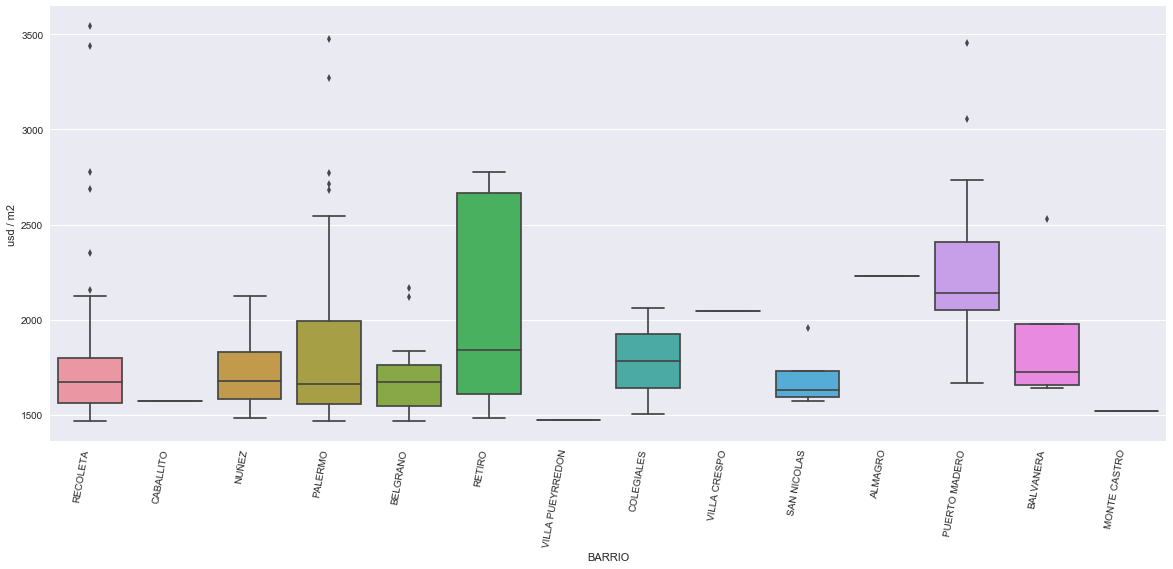

In [69]:
Deptos_2005_sup_quant90 = Deptos_2005.loc[Deptos_2005['U_S_M2']>percentil_2005]

var = 'BARRIO'
data = pd.concat([Deptos_2005_sup_quant90['U_S_M2'], Deptos_2005_sup_quant90 [var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="U_S_M2", data=data)
plt.ylabel('usd / m2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right");

## Barrios 2005 menor al cauntil 95

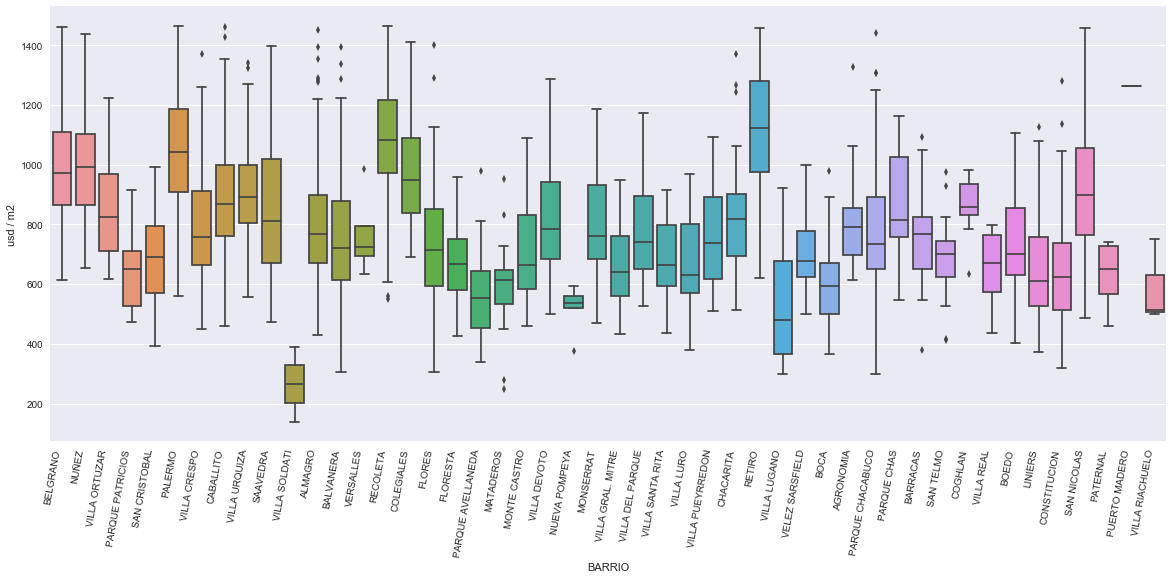

In [70]:
Deptos_2005_menor_quant90 = Deptos_2005.loc[Deptos_2005['U_S_M2']<percentil_2005]
var = 'BARRIO'
data = pd.concat([Deptos_2005_menor_quant90['U_S_M2'], Deptos_2005_menor_quant90[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="U_S_M2", data=data)
plt.ylabel('usd / m2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right");

##  Filtro por barrios 2005

In [71]:
# Separo el barrio del data set
# le calculo el percentil 90
# filtro los valores mayores al percentil

PM =Deptos_2005.loc[Deptos_2005['BARRIO']== "PUERTO MADERO"]
PM = PM.loc[PM['U_S_M2']<PM['U_S_M2'].quantile(0.83)]                         # Se aplica filtro de cuantil 83

PALERMO=Deptos_2005.loc[Deptos_2005['BARRIO']== "PALERMO"]
PALERMO = PALERMO.loc[PALERMO['U_S_M2']<PALERMO['U_S_M2'].quantile(0.90)]

BELGRANO=Deptos_2005.loc[Deptos_2005['BARRIO']== "BELGRANO"]
BELGRANO = BELGRANO.loc[BELGRANO['U_S_M2']< BELGRANO['U_S_M2'].quantile(0.90)]

RECOLETA=Deptos_2005.loc[Deptos_2005['BARRIO']== "RECOLETA"]
RECOLETA = RECOLETA.loc[RECOLETA['U_S_M2']< RECOLETA['U_S_M2'].quantile(0.90)]


# Genero una matriz nueva con los barrios que no tiene filtro propio 

Barrios= Deptos_2005.loc[(Deptos_2005['BARRIO'] != "PALERMO" )] 
Barrios= Barrios.loc[(Barrios['BARRIO'] != "BELGRANO")]
Barrios= Barrios.loc[(Barrios['BARRIO'] != "RECOLETA")]    
Barrios= Barrios.loc[(Barrios['BARRIO'] != "PUERTO MADERO")]

# Le aplico el filtro a los barrios con pocos outliners

Barrios = Barrios.loc[Barrios['U_S_M2']< Barrios['U_S_M2'].quantile(0.90)]


## Dataset 2005 con datos filtrados

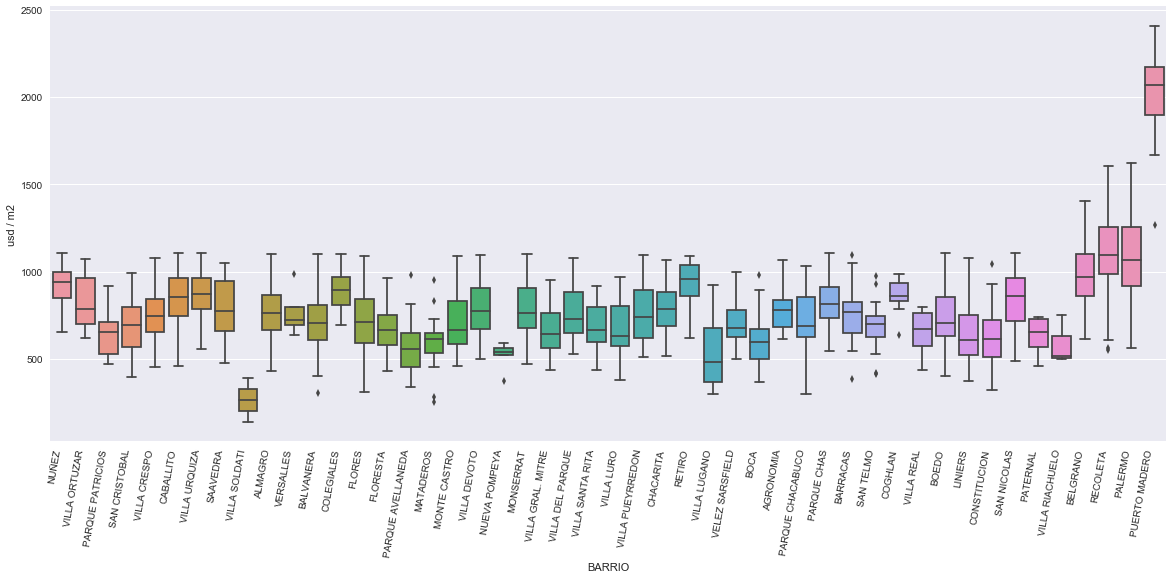

In [72]:
Deptos_2005_filtrado=pd.concat([Barrios,BELGRANO,RECOLETA,PALERMO,PM ])

var = 'BARRIO'
data = pd.concat([Deptos_2005_filtrado['U_S_M2'], Deptos_2005_filtrado[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="U_S_M2", data=data)
plt.ylabel('usd / m2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right");
plt.show()

## Matriz aux con cantidad de datos

In [73]:
r=[0]*3
r[0]=np.shape(Deptos_2016_filtrado)[0]
r[1]=np.shape(Deptos_2010_filtrado)[0]
r[2]=np.shape(Deptos_2005_filtrado)[0]

pd.DataFrame({ 'Año':['2016','2010','2005'] , 
                'Datos originales':[s[0],s[1],s[2]] ,
                'Datos limpios':[t[0],t[1],t[2]] ,
                'Datos sin outliners':[r[0],r[1],r[2]]} ) 

,Año,Datos originales,Datos limpios,Datos sin outliners
0,2016,7564,5816,5206
1,2010,18466,18012,16118
2,2005,3503,3503,3149


# Comparacion grafica sin filtro vs con filtro

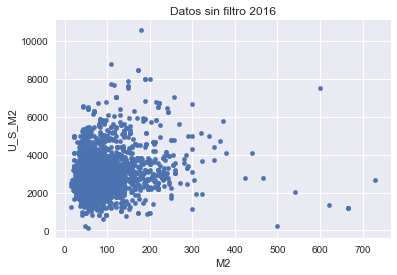

In [74]:
var = 'M2'
data = pd.concat([Deptos_2016['U_S_M2'], Deptos_2016[var]], axis=1)
data.plot.scatter(x=var, y='U_S_M2');
plt.title("Datos sin filtro 2016");

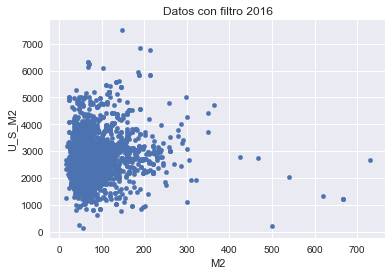

In [75]:
var = 'M2'
data = pd.concat([Deptos_2016_filtrado['U_S_M2'], Deptos_2016[var]], axis=1)
data.plot.scatter(x=var, y='U_S_M2');
plt.title("Datos con filtro 2016");

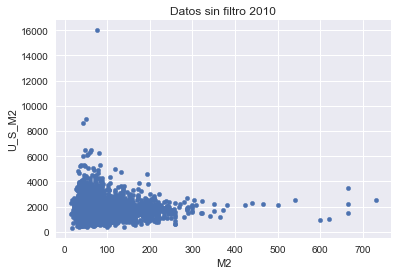

In [76]:
var = 'M2'
data = pd.concat([Deptos_2010['U_S_M2'], Deptos_2016[var]], axis=1)
data.plot.scatter(x=var, y='U_S_M2');
plt.title("Datos sin filtro 2010");

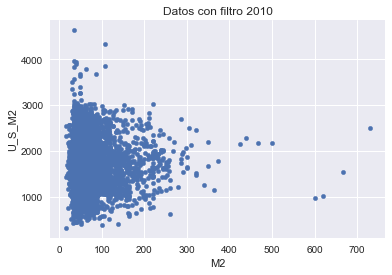

In [77]:
var = 'M2'
data = pd.concat([Deptos_2010_filtrado['U_S_M2'], Deptos_2016[var]], axis=1)
data.plot.scatter(x=var, y='U_S_M2');
plt.title("Datos con filtro 2010");

# Comparacion de estadisticas entre años

In [78]:
a=Deptos_2005_filtrado.U_S_M2.describe()
b=Deptos_2010_filtrado.U_S_M2.describe()
c=Deptos_2016_filtrado.U_S_M2.describe()
d= pd.concat([a,b,c] , axis=1 ,
              keys=['Año 2005','Año 2010','Año 2016'])
d.head(10)

,Año 2005,Año 2010,Año 2016
count,3149.000000,16118.000000,5206.000000
mean,852.069292,1681.456049,2619.735305
std,237.606035,505.511465,670.426139
min,140.000000,317.100000,135.000000
25%,686.600000,1352.900000,2184.000000
50%,833.300000,1650.000000,2524.000000
75%,988.800000,1950.000000,2966.000000
max,2406.800000,5294.100000,7500.000000


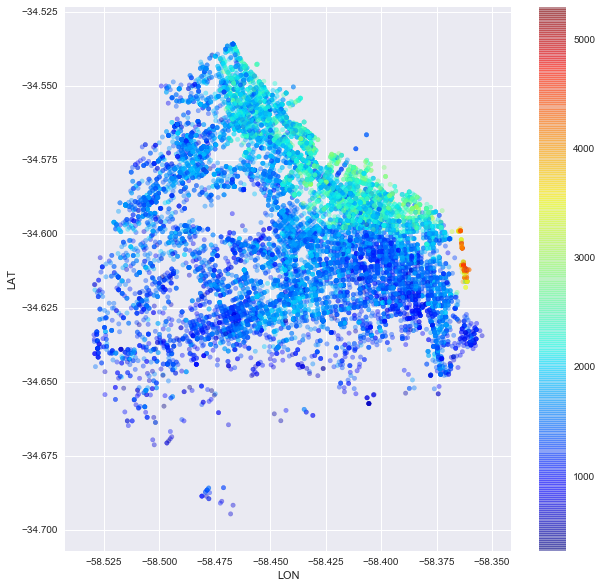

In [79]:
Deptos_2010_filtrado.plot(kind="scatter",  x="LON", y="LAT", alpha=0.4, figsize=(10,10),
                          c=Deptos_2010_filtrado.U_S_M2,
                          cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

plt.show()

# Clustering con K Means

## Importamos librerias

In [80]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.cm as cm

from sklearn import preprocessing
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering

## Seleccionamos features para trabajar

In [81]:
Deptos_2016_filtrado.columns

Index(['CALLE', 'NUMERO', 'ID_ZONAPRO', 'OPERACION', 'TIPO', 'M2', 'M2CUB',
       'PRECIOARS', 'PRECIOARSM', 'DOLARES', 'U_S_M2', 'AMBIENTES',
       'ANTIGUEDAD', 'BAÑOS', 'DIRECCION', 'LOCATION', 'PUBLICADO',
       'PROCESADO', 'URL', 'DIRECCION_NORMALIZADA', 'BARRIO', 'COMUNA',
       'LATITUD', 'LONGITUD'],
      dtype='object')

In [82]:
x16=Deptos_2016_filtrado.loc[: ,['PRECIOARS','U_S_M2','M2','LATITUD','LONGITUD'] ]

## Auto scaling

In [83]:
scaler = preprocessing.StandardScaler().fit(x16)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [84]:
xscal = scaler.transform(x16)

n_comps = 4
sklearn_pca = sklearnPCA(n_components= n_comps)
prop_pca = pd.DataFrame(sklearn_pca.fit_transform(prop_scal))
eigenvalues = sklearn_pca.explained_variance_ratio_

## PCA

In [85]:
n_comps = 4
sklearn_pca = sklearnPCA(n_components= n_comps)
prop_pca = pd.DataFrame(sklearn_pca.fit_transform(xscal))
eigenvalues= sklearn_pca.explained_variance_ratio_

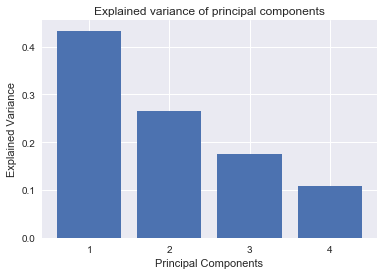

In [86]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of principal components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [87]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(xscal)

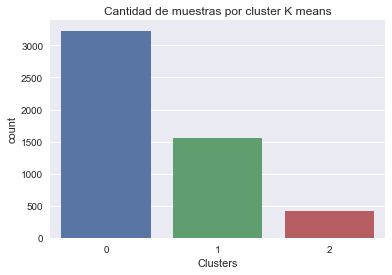

In [88]:
sns.countplot(kmeans.labels_)
plt.title("Cantidad de muestras por cluster K means")
plt.xlabel("Clusters")
plt.show()

In [89]:
n_comps = 4
sklearn_pca = sklearnPCA(n_components= n_comps)
xpca = pd.DataFrame(sklearn_pca.fit_transform(xscal))
eigenvalues = sklearn_pca.explained_variance_ratio_

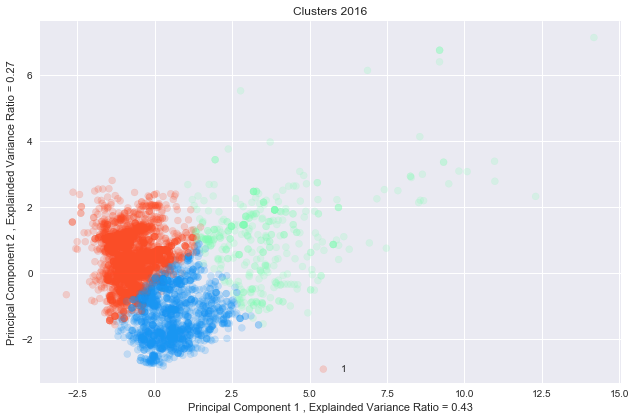

In [90]:
y_pca = np.reshape(np.array(kmeans.labels_),(len(kmeans.labels_),1))
col = np.zeros((len(y_pca[:,0]),4))
for t in range(len(y_pca[:,0])):
    if y_pca[t,0]==1:
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.2, 0.4, 1)),(4,))
    elif y_pca[t,0]==0: 
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.9, 0.6, 1)),(4,))
    elif y_pca[t,0]==2:
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.5, 0.6, 1)),(4,))
    
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[:,0],xpca.loc[:,1], c=col, alpha = 0.2)    
plt.xlabel('Principal Component 1 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[1],2)))
plt.title('Clusters 2016')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

### Sacamos las labels resultado del clustering y las colocamos con los datos selecciones, para graficarlas en el mapa

### Se tuvo que extrar los colores del resultado y modificar el indice de este data frama para graficar

In [91]:
 y_pca

array([[0],
       [1],
       [1],
       ...,
       [2],
       [2],
       [2]])

### Extracion del color

In [92]:
color16=pd.DataFrame(col)
color16.head()

,0,1,2,3
0,1.0,0.303153,0.153392,1.0
1,0.1,0.587785,0.951057,1.0
2,0.1,0.587785,0.951057,1.0
3,0.1,0.587785,0.951057,1.0
4,0.1,0.587785,0.951057,1.0


### Extracion de las labels del clustering

In [93]:
label16 = pd.DataFrame(y_pca , columns=['Label'] )
label16.head()

,Label
0,0
1,1
2,1
3,1
4,1


In [94]:
ClusterResult16=pd.concat([label16,color16], axis=1)
ClusterResult16.head()

,Label,0,1,2,3
0,0,1.0,0.303153,0.153392,1.0
1,1,0.1,0.587785,0.951057,1.0
2,1,0.1,0.587785,0.951057,1.0
3,1,0.1,0.587785,0.951057,1.0
4,1,0.1,0.587785,0.951057,1.0


In [95]:
ClusterResult16.index

RangeIndex(start=0, stop=5206, step=1)

In [96]:
x16.index

Int64Index([   6,   38,   39,   40,   41,   42,   43,   52,   53,   54,
            ...
            4557, 4575, 5068, 5069, 5402, 5649, 6599, 6944, 7183, 7546],
           dtype='int64', length=5206)

In [97]:
ClusterResult16.index=x16.index
ClusterResult16.head()

,Label,0,1,2,3
6,0,1.0,0.303153,0.153392,1.0
38,1,0.1,0.587785,0.951057,1.0
39,1,0.1,0.587785,0.951057,1.0
40,1,0.1,0.587785,0.951057,1.0
41,1,0.1,0.587785,0.951057,1.0


In [98]:
x16.head()

,PRECIOARS,U_S_M2,M2,LATITUD,LONGITUD
6,1816535,2307,50,-34.592984,-58.441542
38,4112500,3013,78,-34.570587,-58.479838
39,2642500,3020,50,-34.570587,-58.479838
40,4165000,3091,88,-34.570587,-58.479838
41,3675000,3043,69,-34.570587,-58.479838


In [99]:
y16= pd.concat([x16,ClusterResult16], axis=1)
y16.head()

,PRECIOARS,U_S_M2,M2,LATITUD,LONGITUD,Label,0,1,2,3
6,1816535,2307,50,-34.592984,-58.441542,0,1.0,0.303153,0.153392,1.0
38,4112500,3013,78,-34.570587,-58.479838,1,0.1,0.587785,0.951057,1.0
39,2642500,3020,50,-34.570587,-58.479838,1,0.1,0.587785,0.951057,1.0
40,4165000,3091,88,-34.570587,-58.479838,1,0.1,0.587785,0.951057,1.0
41,3675000,3043,69,-34.570587,-58.479838,1,0.1,0.587785,0.951057,1.0


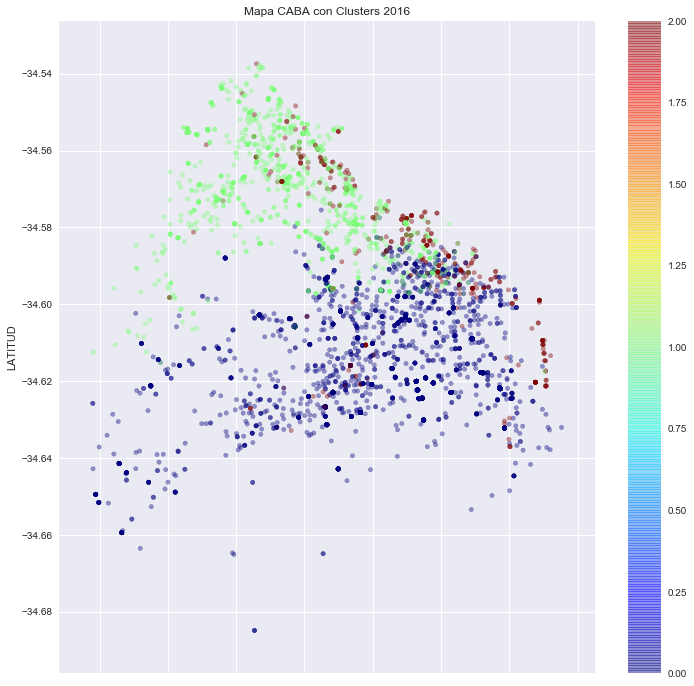

In [100]:
y16.plot(kind="scatter",  x="LONGITUD", y="LATITUD", alpha=0.4, figsize=(12,12),
                          c=y16.Label,
                          cmap=plt.get_cmap("jet"))
plt.title('Mapa CABA con Clusters 2016')
plt.show()

# Clusters 2010

In [101]:
Deptos_2010_filtrado.columns

Index(['AMBIENTES', 'ANTIGUEDAD', 'BARRIO', 'BAÑOS', 'CALLE', 'COMUNA',
       'DIRECCION', 'DIRECCION_NORMALIZADA', 'DOLARES', 'ID_ZONAPRO', 'LAT',
       'LATITUD', 'LOCATION', 'LON', 'LONGITUD', 'M2', 'M2CUB', 'NUMERO',
       'OPERACION', 'PRECIOARS', 'PRECIOARSM', 'PROCESADO', 'PUBLICADO',
       'TIPO', 'URL', 'U_S_M2'],
      dtype='object')

In [102]:
x10=Deptos_2010_filtrado.loc[: ,['U_S_M2','M2','LAT','LON'] ]

x10.isnull().sum()

U_S_M2    0
M2        0
LAT       0
LON       0
dtype: int64

In [103]:
scaler = preprocessing.StandardScaler().fit(x10)
xscal = scaler.transform(x10)

In [104]:
n_comps = 4
sklearn_pca = sklearnPCA(n_components= n_comps)
prop_pca = pd.DataFrame(sklearn_pca.fit_transform(xscal))
eigenvalues = sklearn_pca.explained_variance_ratio_

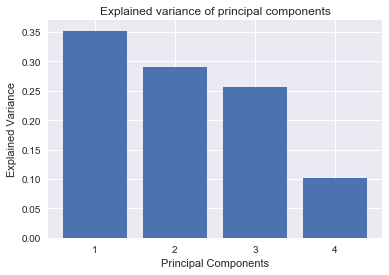

In [105]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of principal components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [106]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(xscal)

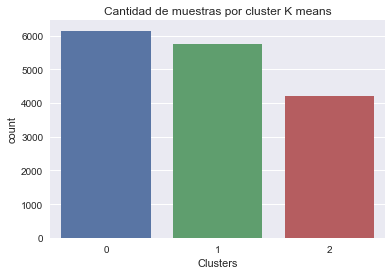

In [107]:
sns.countplot(kmeans.labels_)
plt.title("Cantidad de muestras por cluster K means")
plt.xlabel("Clusters")
plt.show()

In [108]:
n_comps = 3
sklearn_pca = sklearnPCA(n_components= n_comps)
xpca = pd.DataFrame(sklearn_pca.fit_transform(xscal))
eigenvalues = sklearn_pca.explained_variance_ratio_

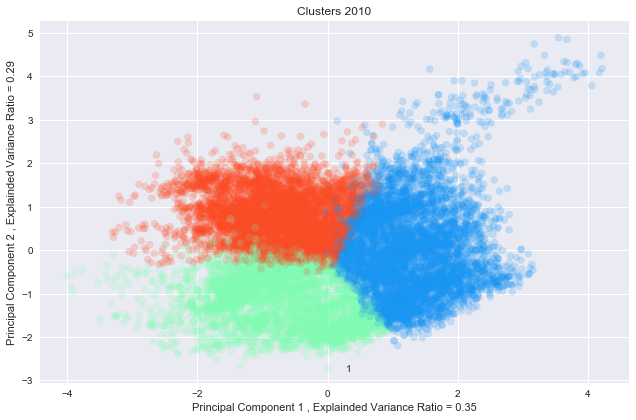

In [109]:
y_pca = np.reshape(np.array(kmeans.labels_),(len(kmeans.labels_),1))
col = np.zeros((len(y_pca[:,0]),4))
for t in range(len(y_pca[:,0])):
    if y_pca[t,0]==1:
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.2, 0.4, 1)),(4,))
    elif y_pca[t,0]==0: 
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.9, 0.6, 1)),(4,))
    elif y_pca[t,0]==2:
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.5, 0.6, 1)),(4,))
   
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[:,0],xpca.loc[:,1], c=col, alpha = 0.2)    
plt.xlabel('Principal Component 1 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[1],2)))
plt.title('Clusters 2010')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

### Extracion de resultados

In [110]:
label10 = pd.DataFrame(y_pca , columns=['Label'] )
label10.head()

,Label
0,2
1,1
2,1
3,2
4,0


In [111]:
color10=pd.DataFrame(col)
color10.head()

,0,1,2,3
0,0.503922,0.999981,0.704926,1.0
1,0.100000,0.587785,0.951057,1.0
2,0.100000,0.587785,0.951057,1.0
3,0.503922,0.999981,0.704926,1.0
4,1.000000,0.303153,0.153392,1.0


In [112]:
ClusterResult10=pd.concat([label10,color10], axis=1)
ClusterResult10.index=x10.index
y10= pd.concat([x10,ClusterResult10], axis=1)
y10.head()

,U_S_M2,M2,LAT,LON,Label,0,1,2,3
61,978.6,140.0,-34.577798,-58.462392,2,0.503922,0.999981,0.704926,1.0
62,1644.6,60.5,-34.578315,-58.461601,1,0.100000,0.587785,0.951057,1.0
63,2023.8,42.0,-34.583301,-58.461812,1,0.100000,0.587785,0.951057,1.0
64,610.3,203.0,-34.578315,-58.461601,2,0.503922,0.999981,0.704926,1.0
65,1341.5,41.0,-34.633253,-58.398305,0,1.000000,0.303153,0.153392,1.0


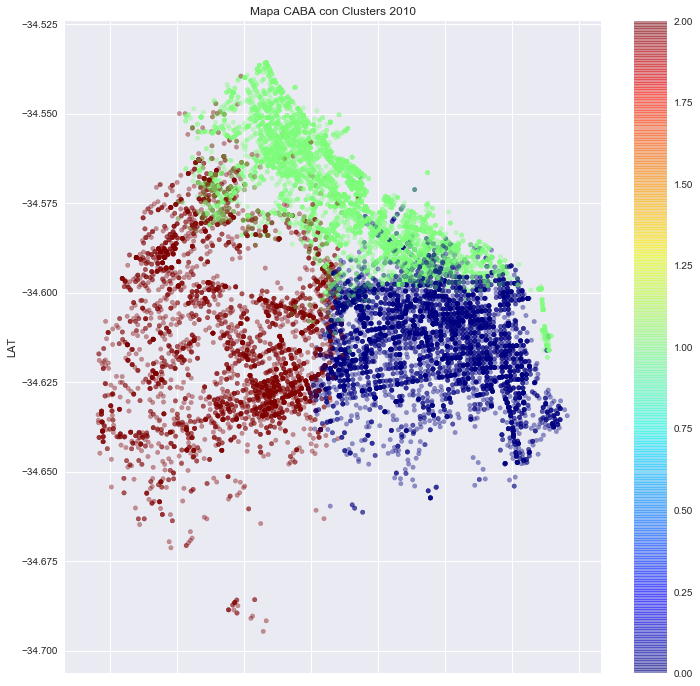

In [113]:
y10.plot(kind="scatter",  x="LON", y="LAT", alpha=0.4, figsize=(12,12),
                          c=y10.Label,
                          cmap=plt.get_cmap("jet"))
plt.title('Mapa CABA con Clusters 2010')
plt.show()

# Clusters 2005

In [114]:
Deptos_2005_filtrado.columns

Index(['CALLE', 'NUMERO', 'M2', 'DOLARES', 'U_S_M2', 'AMBIENTES', 'ANTIGUEDAD',
       'BARRIO', 'COMUNA', 'LON', 'LAT'],
      dtype='object')

In [115]:
x05=Deptos_2005_filtrado.loc[: ,['DOLARES','U_S_M2','M2','LAT','LON'] ]

x05.isnull().sum()

DOLARES    0
U_S_M2     0
M2         0
LAT        0
LON        0
dtype: int64

In [116]:

scaler = preprocessing.StandardScaler().fit(x05)

xscal = scaler.transform(x05)

In [117]:
n_comps = 4
sklearn_pca = sklearnPCA(n_components= n_comps)
prop_pca = pd.DataFrame(sklearn_pca.fit_transform(xscal))
eigenvalues = sklearn_pca.explained_variance_ratio_

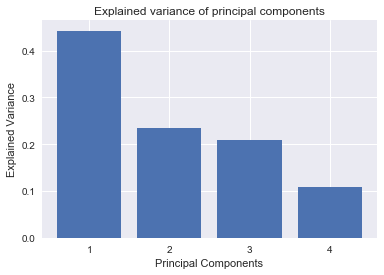

In [118]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of principal components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [119]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(xscal)

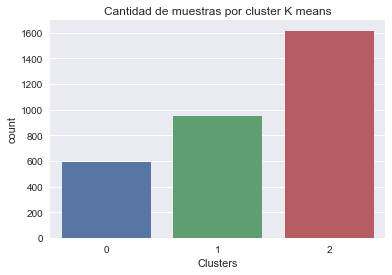

In [120]:
sns.countplot(kmeans.labels_)
plt.title("Cantidad de muestras por cluster K means")
plt.xlabel("Clusters")
plt.show()

In [121]:
n_comps = 3
sklearn_pca = sklearnPCA(n_components= n_comps)
xpca = pd.DataFrame(sklearn_pca.fit_transform(xscal))
eigenvalues = sklearn_pca.explained_variance_ratio_

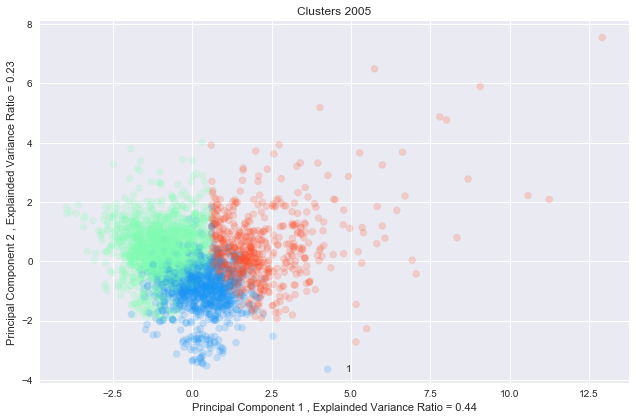

In [122]:
y_pca = np.reshape(np.array(kmeans.labels_),(len(kmeans.labels_),1))
col = np.zeros((len(y_pca[:,0]),4))
for t in range(len(y_pca[:,0])):
    if y_pca[t,0]==1:
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.2, 0.4, 1)),(4,))
    elif y_pca[t,0]==0: 
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.9, 0.6, 1)),(4,))
    elif y_pca[t,0]==2:
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.5, 0.6, 1)),(4,))
 
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[:,0],xpca.loc[:,1], c=col, alpha = 0.2)    
plt.xlabel('Principal Component 1 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[1],2)))
plt.title('Clusters 2005')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

### Extracion de resultados

In [123]:
label05 = pd.DataFrame(y_pca , columns=['Label'] )
label05.head()

,Label
0,1
1,1
2,1
3,1
4,1


In [124]:
color05=pd.DataFrame(col)
color05.head()

,0,1,2,3
0,0.1,0.587785,0.951057,1.0
1,0.1,0.587785,0.951057,1.0
2,0.1,0.587785,0.951057,1.0
3,0.1,0.587785,0.951057,1.0
4,0.1,0.587785,0.951057,1.0


In [125]:
ClusterResult05=pd.concat([label05,color05], axis=1)
ClusterResult05.index=x05.index

In [126]:
y05= pd.concat([x05,ClusterResult05], axis=1)
y05.head()

,DOLARES,U_S_M2,M2,LAT,LON,Label,0,1,2,3
7,54900,1098.0,50,-34.551182,-58.457136,1,0.1,0.587785,0.951057,1.0
8,46000,754.1,61,-34.552069,-58.456869,1,0.1,0.587785,0.951057,1.0
9,68500,1104.8,62,-34.545493,-58.461290,1,0.1,0.587785,0.951057,1.0
11,58000,966.7,60,-34.577272,-58.462453,1,0.1,0.587785,0.951057,1.0
12,58000,966.7,60,-34.576467,-58.463574,1,0.1,0.587785,0.951057,1.0


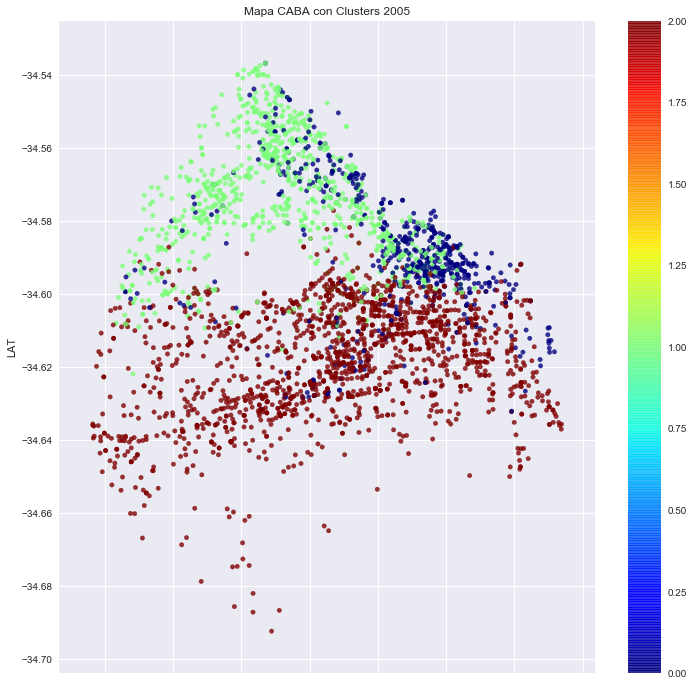

In [127]:
y05.plot(kind="scatter",  x="LON", y="LAT", alpha=0.8, figsize=(12,12),
                          c=y05.Label,
                          cmap=plt.get_cmap("jet"))
plt.title('Mapa CABA con Clusters 2005')
plt.show()

# Comparacion entre Clusters

In [171]:
pd.DataFrame(y16.groupby('Label')['M2'].mean()) 

,M2
Label,
0,56.663054
1,60.859536
2,173.741176


In [172]:
pd.DataFrame(y10.groupby('Label')['M2'].mean()) 

,M2
Label,
0,76.232222
1,85.299081
2,74.505898


In [173]:
pd.DataFrame(y05.groupby('Label')['M2'].mean())

,M2
Label,
0,92.358844
1,59.304440
2,62.540557
